In [1]:
# global
homedir = "/u/az6922/"

import random
def generate_srclinkratearr(rttaverage,size,rseed=0):
    random.seed(rseed)
    rateaverage = (rttaverage-1)//2
    diffarr = [random.randint(-rateaverage+1, rateaverage) for _ in range(size)]
    # required_sum = rateaverage * size
    # current_sum = sum(ratearr)1_
    # last_rate = required_sum - current_sum
    # ratearr.append(last_rate)
    ratearr = [rateaverage+diff for diff in diffarr]
    return ratearr

import pickle
import os
def load_stats(dir,q=1,numqueues=2,numports=2,p=0):
    timelist = list()
    bufferpctlist = list()
    qlenlist = list()
    sentlist = list()
    thptlist = list()
    droplist = list()
    threslist = list()
    for i in range(numports * numqueues):
        qlenlist.append(list())
        sentlist.append(list())
        thptlist.append(list())
        droplist.append(list())
        threslist.append(list())

    with open(dir+"tor.tr", 'r') as f:
        lines = f.readlines()[1:-1]
        for line in lines:
            if line.startswith("\x00"): continue
            tokens = line.split()
            timestamp = int(tokens[0])
            buffer = float(tokens[2])
            for i in range(numports * numqueues):
                qlenlist[i].append(int(tokens[3+i*5]))
            for i in range(numports * numqueues):
                thptlist[i].append(float(tokens[3+i*5+1]))
            for i in range(numports * numqueues):
                sentlist[i].append(int(tokens[3+i*5+2]))
            for i in range(numports * numqueues):
                droplist[i].append(int(tokens[3+i*5+3]))
            for i in range(numports * numqueues):
                threslist[i].append(int(tokens[3+i*5+4]))
            timelist.append(timestamp)
            bufferpctlist.append(buffer)
    
    return [timelist,qlenlist[p*numqueues+q],sentlist[p*numqueues+q],thptlist[p*numqueues+q],droplist[p*numqueues+q],threslist[p*numqueues+q]]

def load_output_log(dir):
    # LOG +1.19381e+10ns 316500
    timelist = list()
    minbufferlist = list()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith("LOG"): continue
            tokens = line.split()
            timelist.append(float(tokens[1].rstrip('ns')))
            minbufferlist.append(int(tokens[2]))
    return [timelist,minbufferlist]

def load_output_log_probe(dir):
    # +...ns(time),cmsa,sent,totalbw,n,m,b
    timelist = list()
    cmsalist = list()
    sentlist = list()
    targetlist = list()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith('+'): continue
            tokens = line.split(',')
            timelist.append(float(tokens[0].rstrip('ns')))
            cmsa=int(tokens[1])
            cmsalist.append(cmsa)
            sentlist.append(int(tokens[2]))
            totalbw=float(tokens[3])
            n=int(tokens[4])
            m=float(tokens[5])
            b=float(tokens[6])
            target=float(tokens[7].rstrip('\n'))
            targetlist.append(target)
    return [timelist,cmsalist,sentlist,targetlist]

def load_output_data(dir):
    # DATA,+1.1099e+11ns,93000,6241500,19500
    cmsalist = list()
    sentlist = list()
    minbufferlist = list()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith("DATA"): continue
            tokens = line.split(',')
            cmsalist.append(int(tokens[2]))
            sentlist.append(int(tokens[3]))
            minbufferlist.append(int(tokens[4]))
    return [cmsalist,sentlist,minbufferlist]

def load_output_convergence(dir):
    # +5.54904e+10ns,39800,6243000,6243001,16500,97,0,0,0,39800,0
    # time,cmsa,sent,3,minbuffer,5,m,b,target,currmin_full_buffer,currmax_nonfull_buffer
    # timelist = list()
    # cmsalist = list()
    # sentlist = list()
    # minbufferlist = list()
    # mlist = list()
    # blist = list()
    # targetlist = list()
    # minfulllist = list()
    # maxnonfulllist = list()

    # +2.7799e+11ns,45,90950,6241500,6243001,4500,528,0,0,0,90950,90350
    # time,proberid,cmsa,sent,4,minbuffer,6,m,b,target,currmin_full_buffer,currmax_nonfull_buffer
    timedict = dict()
    cmsadict = dict()
    sentdict = dict()
    minbufferdict = dict()
    mdict = dict()
    bdict = dict()
    targetdict = dict()
    minfulldict = dict()
    maxnonfulldict = dict()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith('+'): continue
            tokens = line.split(',')
            if tokens[1]=="pass" or tokens[1]=="maxbuffer": continue
            proberid = int(tokens[1])
            if proberid not in timedict:
                timedict[proberid] = list()
                cmsadict[proberid] = list()
                sentdict[proberid] = list()
                minbufferdict[proberid] = list()
                mdict[proberid] = list()
                bdict[proberid] = list()
                targetdict[proberid] = list()
                minfulldict[proberid] = list()
                maxnonfulldict[proberid] = list()
            timedict[proberid].append(float(tokens[0].rstrip('ns')))
            cmsadict[proberid].append(int(tokens[2]))
            sentdict[proberid].append(int(tokens[3]))
            minbufferdict[proberid].append(int(tokens[5]))
            mdict[proberid].append(float(tokens[7]))
            bdict[proberid].append(float(tokens[8]))
            targetdict[proberid].append(float(tokens[9]))
            minfulldict[proberid].append(int(tokens[10]))
            maxnonfulldict[proberid].append(int(tokens[11]))
    # return [timelist,cmsalist,sentlist,minbufferlist,mlist,blist,targetlist,minfulllist,maxnonfulllist]
    return [timedict,cmsadict,sentdict,minbufferdict,mdict,bdict,targetdict,minfulldict,maxnonfulldict]

def load_bct(dir,numsender,startsender,simend,numburst):
    startlist = list()
    endlist = list()
    for i in range(numsender):
        with open(f"{dir}gpt_sender{i+startsender}_app0.tr",'r') as f:
            lines = f.readlines()
            for j in range(numburst):
                if len(lines) > j: startlist.append(int(lines[j].split()[0]))
                if len(lines) < numburst*2 and (len(lines)-numburst) < (j+1):
                    endlist.append(simend*1000000)
                else:
                    endlist.append(int(lines[j+numburst].split()[0]))
    return [startlist,endlist]

def load_gpt(dir,numsender):
    # 2100 FlowId 1000 TotalBytes 5611000 SocketState 4 TcpCongState 0 GoodputRxBytes 369240 ThisGoodputRxBytes 369240
    returnlist = list()
    for i in range(numsender):
        timemslist = list()
        thptlist = list()
        gptlist = list()
        with open(f"{dir}gpt_sender{i}_app0.tr",'r') as f:
            lines = f.readlines()
            for line in lines:
                tokens = line.split()
                timemslist.append(int(tokens[0]))
                thptlist.append(int(tokens[4]))
                gptlist.append(int(tokens[10]))
        returnlist.append([timemslist,thptlist,gptlist])
    return returnlist

def load_fct(dir,numsender,startsender):
    # 51022105 FlowId 20000 TotalBytes 5241760
    # 71516996 FlowId 20000 TotalBytes 10000000
    returnlist = list()
    for i in range(startsender,startsender+numsender):
        with open(f"{dir}fct_sender{i}_app0.tr",'r') as f:
            lines = f.readlines()
            if len(lines) < 2:
                returnlist.append(0)
            else:
                startfct = int(lines[0].split()[0])
                endfct = int(lines[1].split()[0])
                returnlist.append(endfct-startfct)
    return returnlist

def load_output_zero(fdir):
    intervallist = list()
    shouldstart = False
    with open(f"{fdir}output.tr",'r') as f:
        lines = f.readlines()
        for line in lines:
            tokens = line.split(',')
            if shouldstart:
                intervalstart = int(tokens[0])
                interval = int(tokens[1])
                intervallist.append([intervalstart,intervalstart+interval])
            else:
                if tokens[0]=="DesignZeroVec":
                    shouldstart = True
    return intervallist

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd

def linear_regression(xarr,yarr):
    x = np.array(xarr)
    y = np.array(yarr)

    # Number of data points
    N = len(x)

    # Calculate the slope (m) and intercept (b) using the formulas
    # m = (N * Σ(xi * yi) - Σxi * Σyi) / (N * Σ(xi^2) - (Σxi)^2)
    # b = (Σyi - m * Σxi) / N

    # Calculate sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)

    # Calculate the slope (m) and intercept (b)
    m = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x**2)
    b = (sum_y - m * sum_x) / N

    # # Display the equation of the best-fit line
    # print(f"Slope: {m:.2f}, Intercept: {b:.2f}")

    # # Create the best-fit line using the model equation
    # y_pred = m * x + b

    return [m,b]

def get_targetbw(cca,nfstr,rttstr):
    with open(f"{homedir}Buffer/experiments/bulk_dec2624/cca{cca}_maxthpt.txt") as fread:
        lines = fread.readlines()
        for line in lines:
            tokens = line.split(',')
            if nfstr==tokens[0] and rttstr==tokens[1]:
                targetbw_raw = float(tokens[2])
                break
    targetbw = int(((targetbw_raw // 1500)+1) * 1500+1)
    return targetbw

def merge_intervals(intervals):
    if not intervals:
        return []

    merged = [intervals[0]]  # Start with the first interval

    for start, end in intervals[1:]:
        last_start, last_end = merged[-1]

        # If the end of the last interval matches the start of the new interval, merge them
        if last_end == start:
            merged[-1] = (last_start, end)  # Extend the last interval
        else:
            merged.append((start, end))  # Otherwise, add it as a new interval

    return merged

setting up experiments

In [2]:
ns3seed = 1
seed = 1
smoothwindow = 100
smoothcollection = 500
q=1
middelay = 1
midbw = 1000
srcbw = midbw*2
sim=200
mi=500
parstring = "5_10_50_20_3_3_5_10_3_5_5_10_5"
smooththreshold = 0
mrnq=12
confseed = 0
numflow=50
cca=4
numsinksarr = [2,3,4,5]

In [5]:
rate10arr = generate_srclinkratearr(10,numflow,rseed=confseed)  
rate300arr = generate_srclinkratearr(300,numflow,rseed=confseed)  
for numsinks in numsinksarr:
    conffile = f"{homedir}Buffer/experiments/nsdi26sp/design_multirtt/configurations/multirtt_numsinks{numsinks}.conf"
    with open(conffile,'w') as f:
        for port in range(numsinks):
            f.write(f"{numflow}\n")
        for inf,nf in enumerate(range(numflow)):
            f.write(f"0\t{inf}\tLong\t100001\t0\t{cca}\t1\t{rate300arr[inf]}\t1\n")
        for port in range(1,numsinks):
            for inf,nf in enumerate(range(numflow)):
                f.write(f"{port}\t{inf}\tLong\t100001\t0\t{cca}\t1\t{rate10arr[inf]}\t1\n")

In [3]:
file = f"{homedir}Buffer/experiments/nsdi26sp/design_multirtt/bulk1.conf"
with open(file,'w') as f:
    for numsinks in numsinksarr:
        configname = f"multirtt_numsinks{numsinks}"
        conffile = f"../experiments/nsdi26sp/design_multirtt/configurations/{configname}.conf"
        
        totalbuffer = 10000000+1000000*(numsinks-1)
        startbuffer = int(totalbuffer//10)
        targetbw = int(totalbuffer//10)

        middelaystr=f"{middelay}"
        midbwstr=f"{midbw}"
        srcbwstr=f"{srcbw}"
        for i in range(numsinks-1):
            middelaystr+=f"_{middelay}"
            midbwstr+=f"_{midbw}"
            srcbwstr+=f"_{srcbw}"

        # Titrate
        pawmode="paw"
        qdisctype="Fifo"
        bufferalg="111"
        confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
        logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
        f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

        # CoDel
        # pawmode="fixed"
        # qdisctype="CoDel"
        # bufferalg="101"
        # alpha=8
        # confstr = f"--codelTarget=5ms --codelInterval=100ms --alphaString={alpha} --targetBW={targetbw}"
        # logstr = f"codel_5ms_100ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
        # f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

        # # PIE
        # pawmode="fixed"
        # qdisctype="Pie"
        # bufferalg="101"
        # alpha=8
        # confstr = f"--pieTarget=20ms --alphaString={alpha} --targetBW={targetbw}"
        # logstr = f"pie_20ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
        # f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

        # # Static
        # pawmode="fixed"
        # qdisctype="Fifo"
        # bufferalg="111"
        # startbuffer = BDP
        # confstr = f"--targetBW={targetbw}"
        # logstr = f"{totalbuffer}_{bufferalg}_0_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
        # f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

        # DT8
        # pawmode="pa"
        # qdisctype="Fifo"
        # bufferalg="101"
        # alpha=8
        # confstr = f"--alphaString={alpha} --targetBW={targetbw}"
        # logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
        # f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

        # DT1
        pawmode="pa"
        qdisctype="Fifo"
        bufferalg="101"
        alpha=1
        alphastr=f"{alpha}"
        for i in range(numsinks-1):
            alphastr+=f"_{alpha}"
        confstr = f"--alphaString={alphastr} --targetBW={targetbw}"
        logstr = f"{totalbuffer}_{bufferalg}_{alphastr}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
        f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

plotting

In [ ]:
datadict = dict()
for numsinks in numsinksarr:
    configname = f"multirtt_numsinks{numsinks}"
    conffile = f"../experiments/nsdi26sp/design_multirtt/configurations/{configname}.conf"
    
    totalbuffer = 10000000+1000000*(numsinks-1)
    startbuffer = int(totalbuffer//10)
    targetbw = int(totalbuffer//10)

    middelaystr=f"{middelay}"
    midbwstr=f"{midbw}"
    srcbwstr=f"{srcbw}"
    for i in range(numsinks-1):
        middelaystr+=f"_{middelay}"
        midbwstr+=f"_{midbw}"
        srcbwstr+=f"_{srcbw}"

    datadict[configname] = dict()
    datadict[configname]["titrate"] = dict()
    datadict[configname]["dt1"] = dict()
    datadict[configname]["pie"] = dict()
    datadict[configname]["static"] = dict()

    # Titrate
    pawmode="paw"
    qdisctype="Fifo"
    bufferalg="111"
    confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
    logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
    fdir = f"{homedir}az6922_data/nsdi26sp/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
    if not os.path.exists(fdir+"tor.tr"):
        print(f"***Warning: {fdir}tor.tr not found")
    else:
        print(f"{fdir}tor.tr")
        for port in range(numsinks):
            statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=port)
            if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
            datadict[configname]["titrate"][port] = statslist

    # DT1
    pawmode="pa"
    qdisctype="Fifo"
    bufferalg="101"
    alpha=1
    alphastr=f"{alpha}"
    for i in range(numsinks-1):
        alphastr+=f"_{alpha}"
    confstr = f"--alphaString={alphastr} --targetBW={targetbw}"
    logstr = f"{totalbuffer}_{bufferalg}_{alphastr}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    fdir = f"{homedir}az6922_data/nsdi26sp/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
    if not os.path.exists(fdir+"tor.tr"):
        print(f"***Warning: {fdir}tor.tr not found")
    else:
        print(f"{fdir}tor.tr")
        for port in range(numsinks):
            statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=port)
            if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
            datadict[configname]["dt1"][port] = statslist

In [4]:
with open(f'{homedir}az6922_data/pickle/multirtt.pickle', 'wb') as handle:
    pickle.dump(datadict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [132]:
with open(f'{homedir}/Buffer/experiments/nsdi26sp/design_thpt/bulk1.pickle', 'rb') as handle:
    datadict = pickle.load(handle)

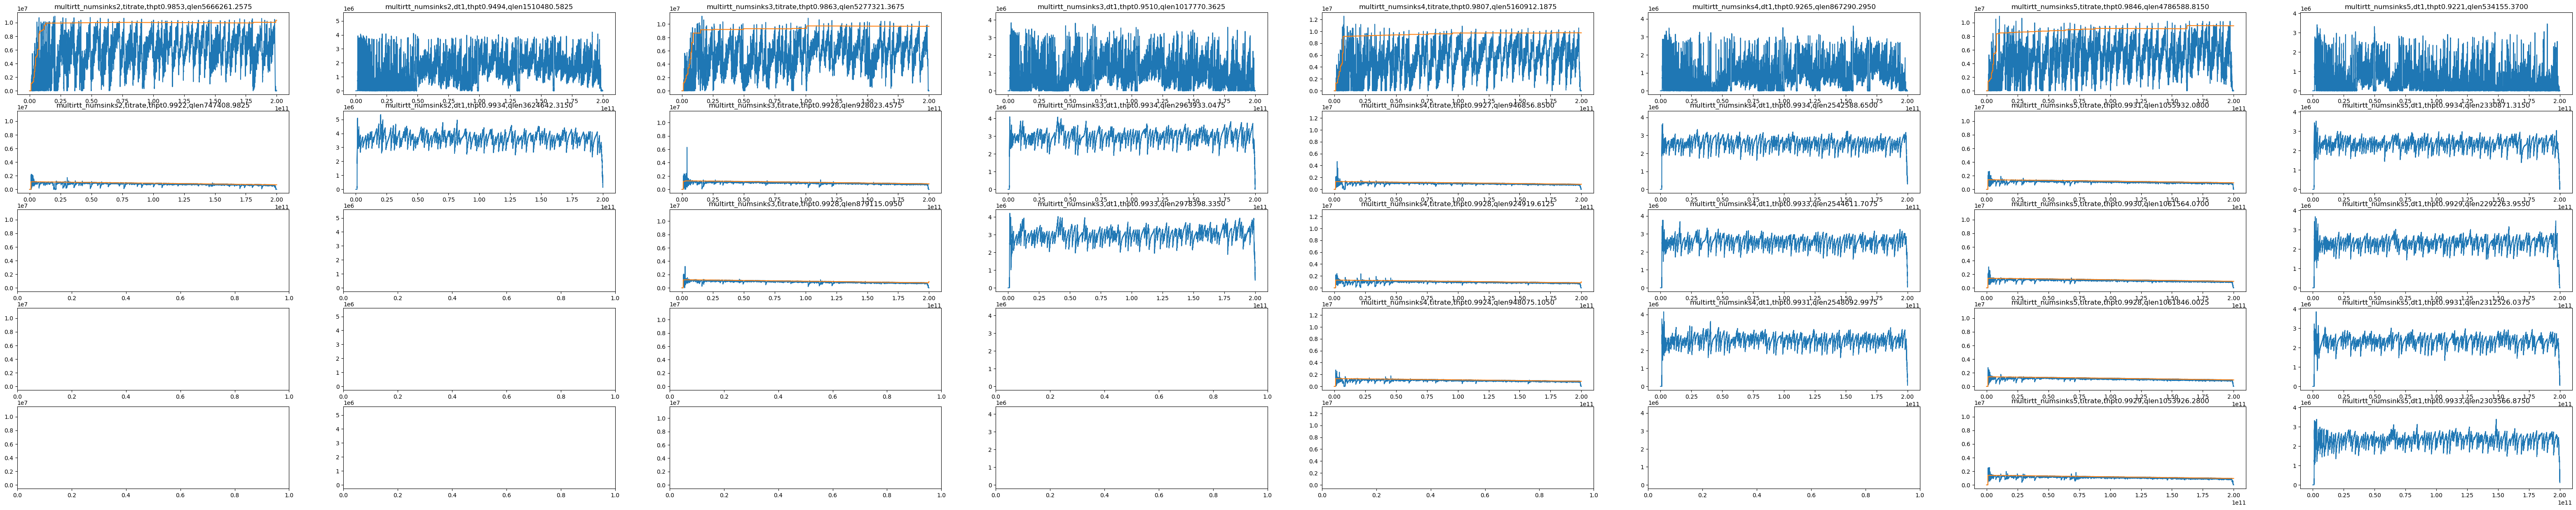

In [5]:
schemearr = ["titrate","dt1"]
# ylimarr = [0.8,0.4,0.8,0.8,0.6,0.8]
arrstart = 0 # 99000 # 0 # 95000
arrend = 200000 # 101000 # 200000 # 105000
# [arrstart:arrend]
nr = max(numsinksarr)
nc = len(schemearr)*len(numsinksarr)
fig,axs = plt.subplots(nr,nc,figsize=(10*nc,3*nr),sharey='col')

for isink,numsinks in enumerate(numsinksarr):
    configname = f"multirtt_numsinks{numsinks}"

    for ischeme,scheme in enumerate(schemearr):
        for iport,port in enumerate(range(numsinks)):
            datator = datadict[configname][scheme]
            if len(datator)>0 and len(datator[0])>0:
                datator = datator[port]
                time = datator[0][arrstart:arrend]
                qlen = datator[1][arrstart:arrend]
                sent = datator[2][arrstart:arrend]
                thpt = datator[3][arrstart:arrend]
                drop = datator[4][arrstart:arrend]
                thres = datator[5][arrstart:arrend]

                axs[iport,isink*len(schemearr)+ischeme].plot(time,qlen)
                if scheme=="titrate": axs[iport,isink*len(schemearr)+ischeme].plot(time,thres)
                axs[iport,isink*len(schemearr)+ischeme].set_title(f"{configname},{scheme},thpt{sum(thpt)/len(thpt):.4f},qlen{sum(qlen)/len(qlen):.4f}")